In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models,losses
import cv2
%matplotlib inline

In [2]:
chinese_valid=pd.read_csv('./car/validation/chinese.csv')
chinese_train=pd.read_csv('./car/training/chinese.csv')
# chinese_train

In [3]:
x_train,y_train=chinese_train.values[:,0:-1]/255,chinese_train.values[:,-1]#/255归一化很重要
x_valid,y_valid=chinese_valid.values[:,0:-1]/255,chinese_valid.values[:,-1]
chinese_label=np.array(['京','闽','粤','苏','沪','浙'])
# x_train=x_train.reshape(-1,40,32,1)
# x_valid=x_valid.reshape(-1,40,32,1)
print(chinese_label.size)
print(x_train.shape)
print(y_train.shape)

6
(1286, 1280)
(1286,)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


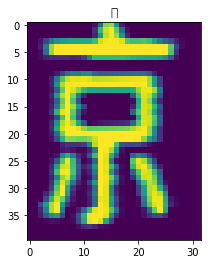

In [9]:
img = x_train[0].reshape(40,-1)
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.title(chinese_label[y_train[0]])
plt.imshow(img)

In [10]:
model_c=models.Sequential([
    layers.Dense(300,activation='relu',input_shape=[1280,]),
    layers.Dense(100,activation='relu'),                     
    layers.Dense(6,activation='softmax')    
])
model_c.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               384300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 606       
Total params: 415,006
Trainable params: 415,006
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_c.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
               loss=tf.keras.losses.sparse_categorical_crossentropy,
               metrics=['accuracy'])

In [12]:
epochs=10
history=model_c.fit(x_train,y_train,epochs=epochs,validation_data=(x_valid,y_valid))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1286 samples, validate on 32 samples
Epoch 1/10
1286/1286 [==============================] - 0s 230us/sample - loss: 0.3820 - accuracy: 0.9028 - val_loss: 0.0630 - val_accuracy: 0.9688
Epoch 2/10
1286/1286 [==============================] - 0s 112us/sample - loss: 0.0220 - accuracy: 0.9946 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 3/10
1286/1286 [==============================] - 0s 113us/sample - loss: 0.0059 - accuracy: 0.9977 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 4/10
1286/1286 [==============================] - 0s 110us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 8.4053e-04 - val_accuracy: 1.0000
Epoch 5/10
1286/1286 [==============================] - 0s 116us/sample - loss: 9.4772e-04 - accuracy: 1.0000 - val_loss: 7.1745e-04 - val_accuracy: 1.0000
Epoch 6/10
1286/1286 [==============================] - 0s 113us/sample - loss: 7.2562e-04 - accuracy: 1.000

In [13]:
model_c.save('./model_c.h5')